In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import string_comparison as SC
import os.path
import jellyfish
import ConfNoMatching as CM
import pickle

cm = CM.ConfNoComparator()

In [2]:
# function to sort dicts
def dict_sort(d):
    new_dict = {}
    keys = sorted(list(d.keys()))
    for k in keys:
        new_dict[k] = d[k]
    return new_dict

In [3]:
TRs = set()
other_chars = set()

In [4]:
file_path = './expdata.csv'
optimized_file_path = './data.csv'

data = None

if(os.path.exists(optimized_file_path)):
    data = pd.read_csv(optimized_file_path)
    # data = data.set_index(['TransactionLineId', 'QualifiedTransactionLineId', 'TransactionLineId1', 'TransactionLineId2', 
    #                         'TransactionReferenceMatchLevelId', 'TransactionReference', 'TransactionReference1', 'IsSelected'])
    
    numoralpha = {'num':0, 'alpha':0, 'numalpha':0, 'other':0}
    specialchars = []
    for index, row in data.iterrows():
        TR = str(row['TransactionReference']); QTR=str(row['TransactionReference1'])
        TRs.add(TR); TRs.add(QTR)
else:
    data = pd.read_csv('expdata.csv')
    # data = data.set_index(['TransactionLineId', 'QualifiedTransactionLineId', 'TransactionLineId1', 'TransactionLineId2', 
    #                         'TransactionReferenceMatchLevelId', 'TransactionReference', 'TransactionReference1', 'IsSelected'])
    
    data.insert(1, 'TR_numalpha_type', 0, True)
    data.insert(1, 'TR_no_nums', 0, True)
    data.insert(1, 'TR_no_alphas', 0, True)
    data.insert(1, 'TR_no_others', 0, True)
    data.insert(1, 'TR_others', 0, True)

    data.insert(1, 'QTR_numalpha_type', 0, True)
    data.insert(1, 'QTR_no_nums', 0, True)
    data.insert(1, 'QTR_no_alphas', 0, True)
    data.insert(1, 'QTR_no_others', 0, True)
    data.insert(1, 'QTR_others', 0, True)

    data.insert(1, 'Cosine', 0, True)
    data.insert(1, 'LCS', 0, True)
    data.insert(1, 'Levenshtein', 0, True)
    
    numoralpha = {'num':0, 'alpha':0, 'numalpha':0, 'other':0}
    specialchars = []

    for index, row in data.iterrows():
        TR = str(row['TransactionReference']); QTR=str(row['TransactionReference1'])
        TRres = list(SC.get_TR_stats(TR).values())
        QTRres = list(SC.get_TR_stats(QTR).values())
        cossine = SC.cosine_similarity(TR, QTR)
        lcs = SC.LCS(TR, QTR)
        levenshtein = SC.levenshtein(TR, QTR)
        
        TRres.extend(QTRres)
        TRres.extend([cossine])
        TRres.extend([lcs])
        TRres.extend([levenshtein])

        data.loc[index, ['TR_numalpha_type','TR_no_nums','TR_no_alphas','TR_no_others','TR_others',
            'QTR_numalpha','QTR_no_nums','QTR_no_alphas','QTR_no_others','QTR_others',
            'Cosine','LCS','Levenshtein']] = TRres
        
        TRs.add(TR); TRs.add(QTR)
    
    data.to_csv(optimized_file_path)

C:\Users\ali.karooni\AppData\Local\Temp\ipykernel_25852\1267107625.py:7: DtypeWarning: Columns (3,5,10,37,38,40,47,55,56,57,58,63,68,73,74,82,83,85,92,100,101,102,103,108,113,118,119) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(optimized_file_path)


In [5]:
#Distribution of TransactionReference length
TRlength = {'nan':0}

for index, row in data.iterrows():
    stay = str(row['TransactionReference'])
    booking = str(row['TransactionReference1'])

    if(stay == 'nan'):
        TRlength['nan'] += 1
    else:
        TRlength[len(stay)] = TRlength.get(len(stay), 0) + 1

    if(booking == 'nan'):
        TRlength['nan'] += 1
    else:    
        TRlength[len(booking)] = TRlength.get(len(booking), 0) + 1

['nan', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '24', '25', '33']
[140767, 38, 249, 169, 432, 3039, 64744, 65246, 1561332, 181820, 609924, 3694, 98329, 40243, 4751, 5473, 168, 58, 21, 14, 156, 86, 456, 9, 818]


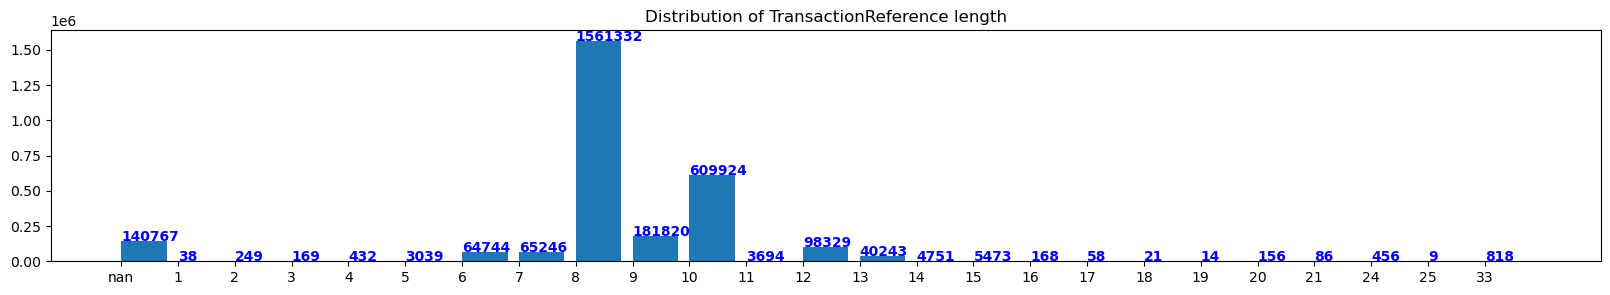

In [7]:
# plotting Distribution of TransactionReference length
without_nan = sorted([[k, v] for k, v in TRlength.items() if k!='nan'])
x = sorted([k  for k, v in without_nan])
y = sorted([v  for k, v in without_nan], key=lambda z:x)
for i, item in enumerate(x): 
    x[i] = str(item)
x.insert(0, 'nan')
y.insert(0, TRlength['nan'])

print(x); print(y)

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_title('Distribution of TransactionReference length')
ax.bar(x, y, align='edge')

for i, v in enumerate(y):
    ax.text(i, v, '{}'.format(int(v)), color='blue', fontweight='bold')

plt.show()

In [8]:
# Distribition of TR length individually (stay, booking)

# without_nan = sorted([[k, v] for k, v in TRlength['Booking'].items() if k!='nan'])
# x = sorted([k  for k, v in without_nan])
# y = sorted([v  for k, v in without_nan], key=lambda z:x)
# for i, item in enumerate(x): 
#     x[i] = str(item)
# x.insert(0, 'nan')
# y.insert(0, TRlength['Booking']['nan'])
# print(x); print(y)

# fig = plt.figure(figsize=(20, 5))
# ax = fig.add_subplot()
# ax.set_title('Count the number of TR with numbers/chars/num&chars')
# ax.bar(x, y, align='edge')

# for i, v in enumerate(y):
#     ax.text(i, v, '{}'.format(int(v)), color='blue', fontweight='bold')

# plt.show()

In [9]:
# Categorising TR into Num/Alpha/NumAlpha/Other
numoralpha = {'num':0, 'alpha':0, 'numalpha':0, 'other':0}

for i in TRs:
    item = str(i)
    if(item.isdigit()):
        numoralpha['num'] +=1
    elif(item.isalpha()):
        numoralpha['alpha'] +=1
    elif(item.isalpha()==False and item.isdigit()==False):
        otherchars = SC.get_other_chars(item)
        if(len(otherchars) == 0):
            numoralpha['numalpha'] += 1
        else:
            numoralpha['other'] += 1

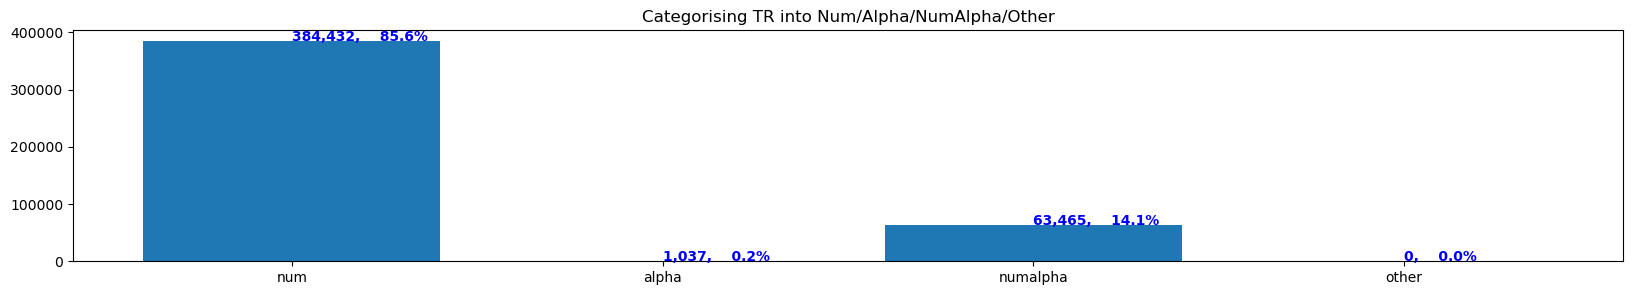

In [115]:
# plotting - Categorising TR into Num/Alpha/NumAlpha/Other
x = list(numoralpha.keys())
y = list(numoralpha.values())
total = sum(list(numoralpha.values()))

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_title('Categorising TR into Num/Alpha/NumAlpha/Other')
ax.bar(x, y)

for i, v in enumerate(y):
    ax.text(i, v, '{:,},    {}%'.format(int(v), str(round(v/total*100, 1))), color='blue', fontweight='bold')

plt.show()

In [10]:
# Distribition of match/maybe_match/nomatch between Num/Alpha/NumAlpha categories
total_no_match = 0
total_no_maybematch = 0
total_no_nomatch = 0
no_match_grouped = {'total':0, 'nums':0, 'alphas':0, 'numalpha':0, 'other':0}
no_maybematch_grouped = {'total':0, 'nums':0, 'alphas':0, 'numalpha':0, 'other':0}
no_nomatch_grouped = {'total':0, 'nums':0, 'alphas':0, 'numalpha':0, 'other':0}

temp = data[data['IsSelected'] == 1]

for index, row in temp.iterrows():    
    if (str(row['TransactionReferenceMatchLevelId'])=='10'):
        total_no_match += 1
        if(row['TR_numalpha_type'] == 'NUM'): no_match_grouped['nums']+=1
        if(row['TR_numalpha_type'] == 'ALPHA'): no_match_grouped['alphas']+=1
        if(row['TR_numalpha_type'] == 'NUMALPHA'): no_match_grouped['numalpha']+=1
        if(row['TR_numalpha_type'] == 'OTHER'): no_match_grouped['other']+=1
    
    if (str(row['TransactionReferenceMatchLevelId'])=='20'):
        total_no_maybematch += 1
        if(row['TR_numalpha_type'] == 'NUM'): no_maybematch_grouped['nums']+=1
        if(row['TR_numalpha_type'] == 'ALPHA'): no_maybematch_grouped['alphas']+=1
        if(row['TR_numalpha_type'] == 'NUMALPHA'): no_maybematch_grouped['numalpha']+=1
        if(row['TR_numalpha_type'] == 'OTHER'): no_maybematch_grouped['other']+=1
    
    if (str(row['TransactionReferenceMatchLevelId'])=='30'):
        total_no_nomatch += 1
        if(row['TR_numalpha_type'] == 'NUM'): no_nomatch_grouped['nums']+=1
        if(row['TR_numalpha_type'] == 'ALPHA'): no_nomatch_grouped['alphas']+=1
        if(row['TR_numalpha_type'] == 'NUMALPHA'): no_nomatch_grouped['numalpha']+=1
        if(row['TR_numalpha_type'] == 'OTHER'): no_nomatch_grouped['other']+=1
no_match_grouped['total'] = total_no_match
no_maybematch_grouped['total'] = total_no_maybematch
no_nomatch_grouped['total'] = total_no_nomatch

{'-': 2858, '.': 292, ' ': 1648, '\r': 502, '/': 4, '+': 8, '~': 4, "'": 1, ';': 2, ',': 1}


) missing from current font.a3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


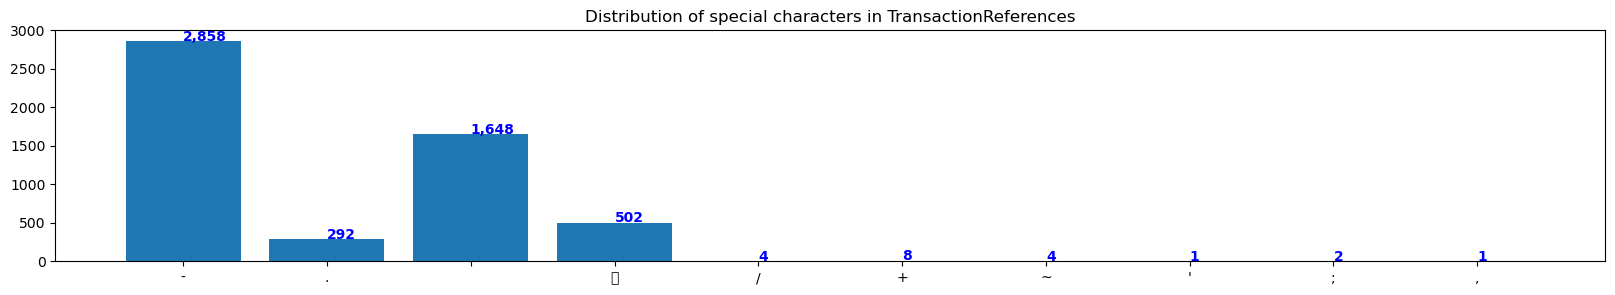

In [11]:
# Distribution of special characters in TransactionReferences

others = {}
for i in TRs:
    item = str(i)
    for j in SC.get_other_chars(item):
        others[j] = others.get(j, 0) + 1
print(others)

x = list(others.keys())
y = list(others.values())
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_title('Distribution of special characters in TransactionReferences')
ax.bar(x, y)

for i, v in enumerate(y):
    ax.text(i, v + 3, '{:,}'.format(int(v)), color='blue', fontweight='bold')

plt.show()

In [12]:
# samples of TRs where they include special chars like + or ;
print('samples of TRs which include + or ;')
j = 0
for i in TRs:
    other = SC.get_other_chars(str(i))
    if(len(other) > 0):
        if('+' in other or ';' in other):
            print(i)
            j+=1
        if(j>20): break

samples of TRs which include + or ;
2393345468+2510
AMYR244969+AMYR244970
2759377082+7604
430220; 430219
3275010055+0338
2193347938+2424
3953837145+4610
430220;430219
3920392658+1470
2393312315+9823


match {'total': 4829, 'nums': 3809, 'alphas': 0, 'numalpha': 956, 'other': 64}
maybematch {'total': 962, 'nums': 84, 'alphas': 125, 'numalpha': 752, 'other': 1}
nomatch {'total': 2009, 'nums': 1892, 'alphas': 49, 'numalpha': 48, 'other': 20}


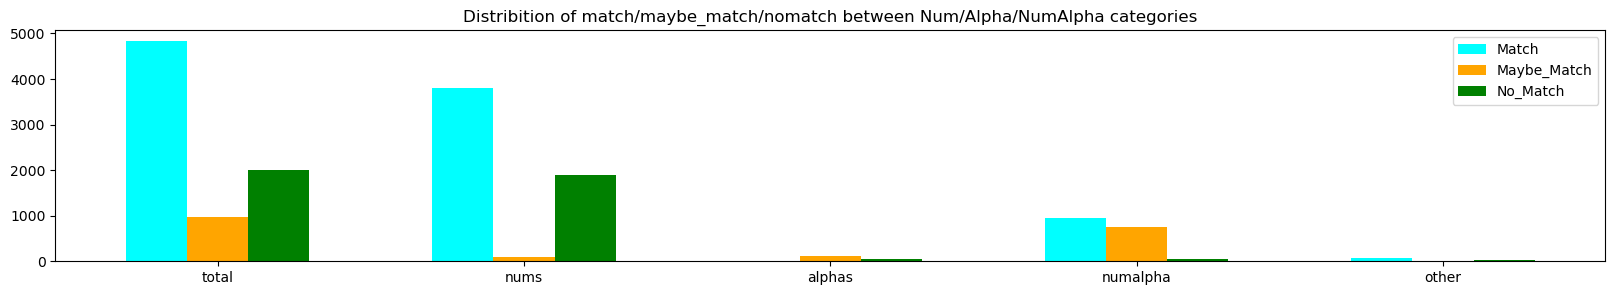

In [13]:
# plotting - Distribition of match/maybe_match/nomatch between Num/Alpha/NumAlpha categories
print('match', no_match_grouped)
print('maybematch', no_maybematch_grouped)
print('nomatch', no_nomatch_grouped)

x = np.arange(5)
y1 = list(no_match_grouped.values())
y2 = list(no_maybematch_grouped.values())
y3 = list(no_nomatch_grouped.values())
width = 0.2

fig = plt.figure(figsize=(20, 3))
ax = fig.subplots()
ax.bar(x-0.2, y1, width, color='cyan')
ax.bar(x    , y2, width, color='orange')
ax.bar(x+0.2, y3, width, color='green')
ax.set_xticks(x, list(no_match_grouped.keys()))
ax.legend(["Match", "Maybe_Match", "No_Match"])
ax.set_title('Distribition of match/maybe_match/nomatch between Num/Alpha/NumAlpha categories')
plt.show()

In [14]:
# Distribution of leveneshtein value between match/maybe_match/no_match 
match_hist = {}
for i in range(25): match_hist[i]=0
maybematch_hist = {}
for i in range(25): maybematch_hist[i]=0
nomatch_hist = {}
for i in range(25): nomatch_hist[i]=0

for index, row in data.iterrows():
    lev = int(row['Levenshtein'])
    if (str(row['TransactionReferenceMatchLevelId'])=='10'):
        match_hist[lev] = match_hist.get(lev, 0) + 1
    if (str(row['TransactionReferenceMatchLevelId'])=='20'):
        maybematch_hist[lev] = maybematch_hist.get(lev, 0) + 1
    if (str(row['TransactionReferenceMatchLevelId'])=='30'):
        nomatch_hist[lev] = nomatch_hist.get(lev, 0) + 1

{0: 20126, 1: 6, 2: 1, 3: 0, 4: 1, 5: 0, 6: 5, 7: 0, 8: 0, 9: 0, 10: 1, 11: 1, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0}


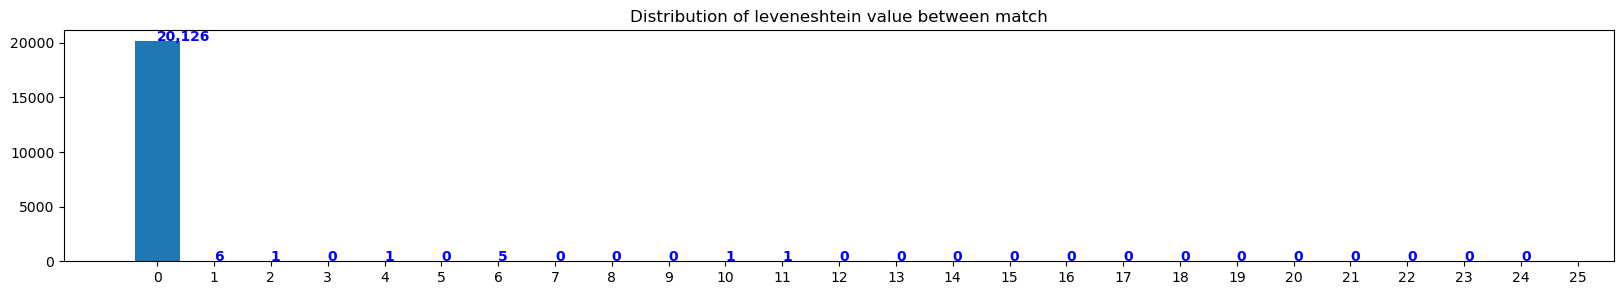

In [15]:
# plotting - Distribution of leveneshtein value between match
print(match_hist)

x = list(match_hist.keys())
y = list(match_hist.values())
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_xticks(np.arange(0,26, 1))
ax.set_title('Distribution of leveneshtein value between match')
ax.bar(x, y)

for i, v in enumerate(y):
    ax.text(i, v, '{:,}'.format(int(v)), color='blue', fontweight='bold')

plt.show()

In [16]:
# print sample of match where they have a big leveneshtein
print('sample of match where leveneshtein > 1')
print('TR1', '---', 'TR2', '---', 'Levenshtein', '---', 'match_level')
print()
i=0
for index, row in data.iterrows():
    if(str(row['TransactionReferenceMatchLevelId'])=='10'  and int(row['Levenshtein'])>1):
        print(row['TransactionReference'], '---', row['TransactionReference1'], '---', row['Levenshtein'], '---', row['TransactionReferenceMatchLevelId'])
        i+=1
    if(i>10): break

sample of match where leveneshtein > 1
TR1 --- TR2 --- Levenshtein --- match_level

3139316993NSCONF --- 3139316993. --- 6 --- 10
3835170301 --- 3835170301/4162423301 --- 11 --- 10
3143583813NON S --- 3143583813NON SMKING CONF --- 10 --- 10
133201219 --- DT133201219 --- 2 --- 10
3344133712 --- 3344133712 PIN --- 4 --- 10
615229355 --- IHW-615229355-1 --- 6 --- 10
IHW-615229355-1 --- 615229355 --- 6 --- 10
614790942 --- IHW-614790942-1 --- 6 --- 10
IHW-614790942-1 --- 614790942 --- 6 --- 10


{0: 2713, 1: 22400, 2: 34604, 3: 37480, 4: 11326, 5: 3155, 6: 1643, 7: 381, 8: 134, 9: 1, 10: 0, 11: 1, 12: 0, 13: 2, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 5, 24: 23, 25: 66, 26: 23, 27: 4}


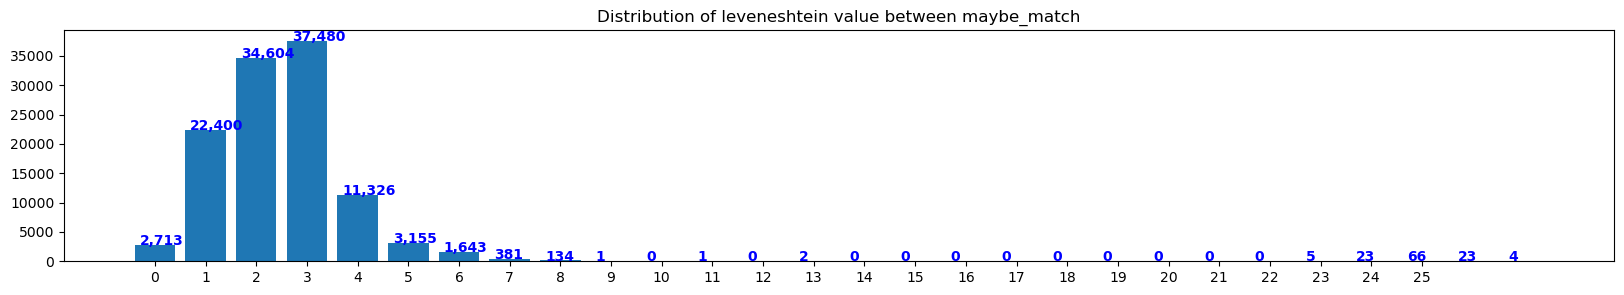

In [17]:
# plotting - Distribution of leveneshtein value between maybe_match
print(maybematch_hist)

x = list(maybematch_hist.keys())
y = list(maybematch_hist.values())
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_xticks(np.arange(0,26, 1))
ax.set_title('Distribution of leveneshtein value between maybe_match')
ax.bar(x, y)

for i, v in enumerate(y):
    ax.text(i-0.3, v, '{:,}'.format(int(v)), color='blue', fontweight='bold')

plt.show()

In [18]:
# print sample of maybe match where they have a big leveneshtein
print('sample of maybe_match where leveneshtein > 7')
print('TR1', '---', 'TR2', '---', 'Levenshtein', '---', 'match_level')
print()
i=0
for index, row in data.iterrows():
    if(str(row['TransactionReferenceMatchLevelId'])=='20'  and int(row['Levenshtein'])>7):
        print(row['TransactionReference'], '---', row['TransactionReference1'], '---', row['Levenshtein'], '---', row['TransactionReferenceMatchLevelId'])
        i+=1
    if(i>5): break

print('--------------------------------------------------------------')
print('sample of maybe_match where leveneshtein > 23')
print('TR1', '---', 'TR2', '---', 'Levenshtein', '---', 'match_level')
print()
i=0
for index, row in data.iterrows():
    if(str(row['TransactionReferenceMatchLevelId'])=='20'  and int(row['Levenshtein'])==0):
        print(row['TransactionReference'], '---', row['TransactionReference1'], '---', row['Levenshtein'], '---', row['TransactionReferenceMatchLevelId'])
        i+=1
    if(i>5): break

sample of maybe_match where leveneshtein > 7
TR1 --- TR2 --- Levenshtein --- match_level

AMYR244967 --- AMYR244969+AMYR244970 --- 11 --- 20
FGAMA0IPY74Y --- FGAMA07OWMKFZS --- 8 --- 20
FGAMA01UNBM2 --- FGAMA07P2JFFXM --- 8 --- 20
FGAMA02LU274 --- FGAMA07OSE8UD6 --- 8 --- 20
FGAMA02LU274 --- FGAMA07OCMPJW6 --- 8 --- 20
FGAMA02LU274 --- FGAMA07OCMIAZ6 --- 8 --- 20
--------------------------------------------------------------
sample of maybe_match where leveneshtein > 23
TR1 --- TR2 --- Levenshtein --- match_level

P8Y3GD1 --- P8Y3GD1 --- 0 --- 20
OKMAIL --- OKMAIL --- 0 --- 20
OKMAIL --- OKMAIL --- 0 --- 20
TQ3BPBS --- TQ3BPBS --- 0 --- 20
TQ3BPBS --- TQ3BPBS --- 0 --- 20
TN2B3B4 --- TN2B3B4 --- 0 --- 20


{0: 84, 1: 4, 2: 12410, 3: 47548, 4: 113429, 5: 204303, 6: 309784, 7: 305498, 8: 145231, 9: 23186, 10: 12787, 11: 7426, 12: 2231, 13: 550, 14: 629, 15: 323, 16: 48, 17: 45, 18: 24, 19: 5, 20: 3, 21: 3, 22: 3, 23: 0, 24: 1, 29: 2, 28: 1, 30: 7, 31: 4, 32: 1}


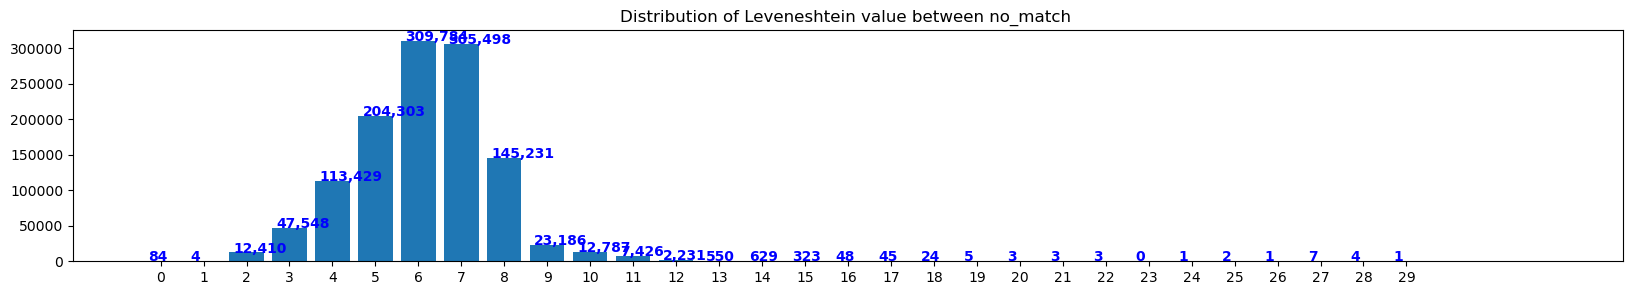

In [19]:
# plotting - Distribution of leveneshtein value between match/maybe_match/no_match 
print(nomatch_hist)

x = list(nomatch_hist.keys())
y = list(nomatch_hist.values())
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_xticks(np.arange(0,30, 1))
ax.set_title('Distribution of Leveneshtein value between no_match ')
ax.bar(x, y)

for i, v in enumerate(y):
    ax.text(i-0.3, v + 3, '{:,}'.format(int(v)), color='blue', fontweight='bold')

plt.show()

In [20]:
# print sample of no_match where they have a big leveneshtein
print('sample of no_match where leveneshtein == 0')
print('TR1', '---', 'TR2', '---', 'Levenshtein', '---', 'match_level')
print()
i=0
for index, row in data.iterrows():
    if(str(row['TransactionReferenceMatchLevelId'])=='30'  and int(row['Levenshtein'])==0):
        print(row['TransactionReference'], '---', row['TransactionReference1'], '---', row['Levenshtein'], '---', row['TransactionReferenceMatchLevelId'])
        i+=1
    if(i>5): break

print('--------------------------------------------------')
print('sample of maybe_match where leveneshtein == 1')
print('TR1', '---', 'TR2', '---', 'Levenshtein', '---', 'match_level')
print()
i=0
for index, row in data.iterrows():
    if(str(row['TransactionReferenceMatchLevelId'])=='30'  and int(row['Levenshtein'])==1):
        print(row['TransactionReference'], '---', row['TransactionReference1'], '---', row['Levenshtein'], '---', row['TransactionReferenceMatchLevelId'])
        i+=1
    if(i>5): break

sample of no_match where leveneshtein == 0
TR1 --- TR2 --- Levenshtein --- match_level

GB --- GB --- 0 --- 30
23 --- 23 --- 0 --- 30
23 --- 23 --- 0 --- 30
DG --- DG --- 0 --- 30
MJ --- MJ --- 0 --- 30
OM --- OM --- 0 --- 30
--------------------------------------------------
sample of maybe_match where leveneshtein == 1
TR1 --- TR2 --- Levenshtein --- match_level

7156 --- 7157 --- 1 --- 30
7157 --- 7156 --- 1 --- 30
2689 --- 2687 --- 1 --- 30
2687 --- 2689 --- 1 --- 30


In [21]:
# distribution of match/maybe_match/no_match group by countries
SupplierCountryCodes = {}

temp = data[data['IsSelected'] == 1]

for index, row in temp.iterrows():
    if(str(row['IsSelected']).strip() == '1'):
        countrycode = row['SupplierCountryCode']
        if(SupplierCountryCodes.get(countrycode, None) == None): SupplierCountryCodes[countrycode] = {'total':0, 10:0, 20:0, 30:0, 40:0}
        SupplierCountryCodes[countrycode]['total'] += 1
        SupplierCountryCodes[countrycode][row['TransactionReferenceMatchLevelId']] += 1
        
list_of_countries = []
x0 = []
x10 = []
x20 = []
x30 = []
x40 = []
for k, v in SupplierCountryCodes.items():
    list_of_countries.append('{}-{}'.format(k, SupplierCountryCodes[k]['total']))
    x0.append(SupplierCountryCodes[k]['total']/len(temp) + 0.1)
    for key, val in v.items():        
        if(key==10): x10.append(int(val)/int(SupplierCountryCodes[k]['total']))
        if(key==20): x20.append(int(val)/int(SupplierCountryCodes[k]['total']))
        if(key==30): x30.append(int(val)/int(SupplierCountryCodes[k]['total']))
        if(key==40): x40.append(int(val)/int(SupplierCountryCodes[k]['total']))

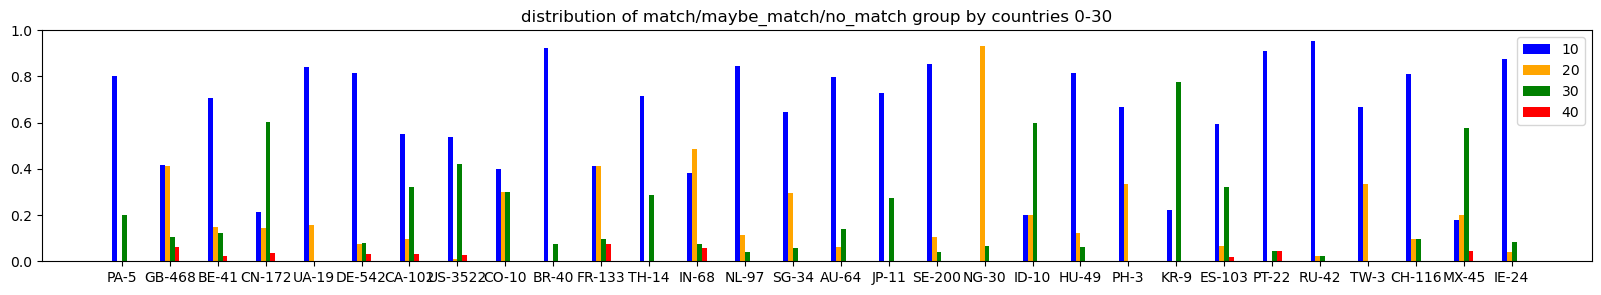

In [22]:
# plotting - distribution of match/maybe_match/no_match group by countries 0-30
x = np.arange(len(list_of_countries[:30]))
y0 = x0[:30]
y1 = x10[:30]
y2 = x20[:30]
y3 = x30[:30]
y4 = x40[:30]
width = 0.1

fig = plt.figure(figsize=(20, 3))
plt.bar(x-0.15, y1, width, color='blue')
plt.bar(x-0.05, y2, width, color='orange')
plt.bar(x+0.05, y3, width, color='green')
plt.bar(x+0.15, y4, width, color='red')
plt.xticks(x, list_of_countries[:30])
plt.legend(["10", "20", "30", "40"])
plt.title('distribution of match/maybe_match/no_match group by countries 0-30')
plt.show()

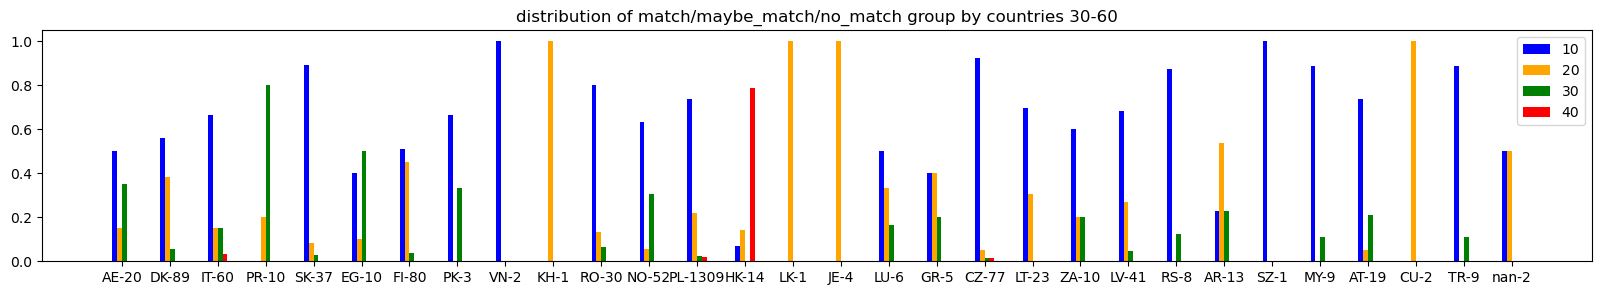

In [23]:
# plotting - distribution of match/maybe_match/no_match group by countries 30-60
x = np.arange(len(list_of_countries[30:60]))
y0 = x0[30:60]
y1 = x10[30:60]
y2 = x20[30:60]
y3 = x30[30:60]
y4 = x40[30:60]
width = 0.1

fig = plt.figure(figsize=(20, 3))
plt.bar(x-0.15, y1, width, color='blue')
plt.bar(x-0.05    , y2, width, color='orange')
plt.bar(x+0.05, y3, width, color='green')
plt.bar(x+0.15, y4, width, color='red')
plt.xticks(x, list_of_countries[30:60])
plt.legend(["10", "20", "30", "40"])
plt.title('distribution of match/maybe_match/no_match group by countries 30-60')
plt.show()

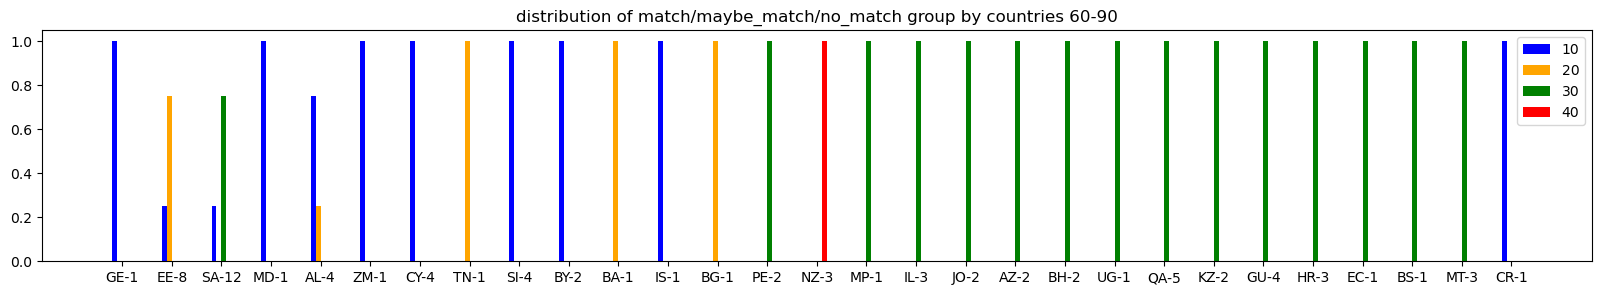

In [24]:
# plotting - distribution of match/maybe_match/no_match group by countries 60-90
x = np.arange(len(list_of_countries[60:]))
y0 = x0[60:]
y1 = x10[60:]
y2 = x20[60:]
y3 = x30[60:]
y4 = x40[60:]
width = 0.1

fig = plt.figure(figsize=(20, 3))
plt.bar(x-0.15, y1, width, color='blue')
plt.bar(x-0.05    , y2, width, color='orange')
plt.bar(x+0.05, y3, width, color='green')
plt.bar(x+0.15, y4, width, color='red')
plt.xticks(x, list_of_countries[60:])
plt.legend(["10", "20", "30", "40"])
plt.title('distribution of match/maybe_match/no_match group by countries 60-90')
plt.show()

In [25]:
# inserting new clean_ columns into dataset 

data.insert(1, 'clean_TransactionReference', 0, True)
data.insert(1, 'clean_TransactionReference1', 0, True)

data.insert(1, 'clean_TR_numalpha_type', 0, True)
data.insert(1, 'clean_TR_no_nums', 0, True)
data.insert(1, 'clean_TR_no_alphas', 0, True)

data.insert(1, 'clean_QTR_numalpha_type', 0, True)
data.insert(1, 'clean_QTR_no_nums', 0, True)
data.insert(1, 'clean_QTR_no_alphas', 0, True)

data.insert(1, 'clean_Jaro_Winkler', 0, True)
data.insert(1, 'clean_damerau_lev', 0, True)
data.insert(1, 'clean_Jaccard', 0, True)
data.insert(1, 'clean_Leveneshtein', 0, True)
data.insert(1, 'clean_LCS', 0, True)

In [26]:
# initializing TRs and other_chars sets
TRs = set()
other_chars = set()

In [27]:
# preprocessing the data and add cleared data into dataset

file_path = './expdata.csv'
clean_optimized_file_path = './data2.csv'

if(os.path.exists(clean_optimized_file_path)):
    data = pd.read_csv(clean_optimized_file_path)
    # data = data.set_index(['TransactionLineId', 'QualifiedTransactionLineId', 'TransactionLineId1', 'TransactionLineId2', 
    #                         'TransactionReferenceMatchLevelId', 'TransactionReference', 'TransactionReference1', 'IsSelected'])
                            
    for index, row in data.iterrows():
        TR = str(row['clean_TransactionReference']); QTR=str(row['clean_TransactionReference1'])
        TRs.add(TR); TRs.add(QTR)
else:
    for index, row in data.iterrows():
        TR=SC.remove_special_chars(str(row['TransactionReference'])); QTR=SC.remove_special_chars(str(row['TransactionReference1']))
        finallist = [TR, QTR]
        TRres = list(SC.get_TR_stats(TR).values())[:-2]
        QTRres = list(SC.get_TR_stats(QTR).values())[:-2]
        
        JaroWinkler = jellyfish.jaro_winkler(TR, QTR)
        lcs = SC.LCS(TR, QTR)
        levenshtein = SC.levenshtein(TR, QTR)
        
        jaro = SC.Jaro_Winkler(TR, QTR)
        damerau_lev = SC.damerau_levenshtein_distance(TR, QTR)
        jaccard = SC.jaccard_similarity(TR, QTR)
        lev = SC.levenshtein(TR, QTR)
        lcs = SC.LCS(TR, QTR)


        finallist.extend(TRres)
        finallist.extend(QTRres)
        finallist.extend([jaro, damerau_lev, jaccard, lev, lcs])
        
        data.loc[index, ['clean_TransactionReference', 'clean_TransactionReference1',
            'clean_TR_numalpha_type','clean_TR_no_nums','clean_TR_no_alphas',
            'clean_QTR_numalpha_type','clean_QTR_no_nums','clean_QTR_no_alphas',
            'clean_Jaro_Winkler', 'clean_damerau_lev','clean_Jaccard', 'clean_Leveneshtein', 'clean_LCS']] = finallist
        
        TRs.add(TR); TRs.add(QTR)

    data.to_csv(clean_optimized_file_path)

C:\Users\ali.karooni\AppData\Local\Temp\ipykernel_25852\1106236536.py:7: DtypeWarning: Columns (2,13,14,17,19,24,51,52,54,61,69,70,71,72,77,82,87,88,96,97,99,105,106,114,115,116,117,122,127,132,133) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(clean_optimized_file_path)


In [28]:
# Categorising TR into Num/Alpha/NumAlpha/Other
numoralpha = {'num':0, 'alpha':0, 'numalpha':0, 'other':0}

for i in TRs:
    item = str(i)
    if(item.isdigit()):
        numoralpha['num'] +=1
    elif(item.isalpha()):
        numoralpha['alpha'] +=1
    elif(item.isalpha()==False and item.isdigit()==False):
        otherchars = SC.get_other_chars(item)
        if(len(otherchars) == 0):
            numoralpha['numalpha'] += 1
        else:
            numoralpha['other'] += 1

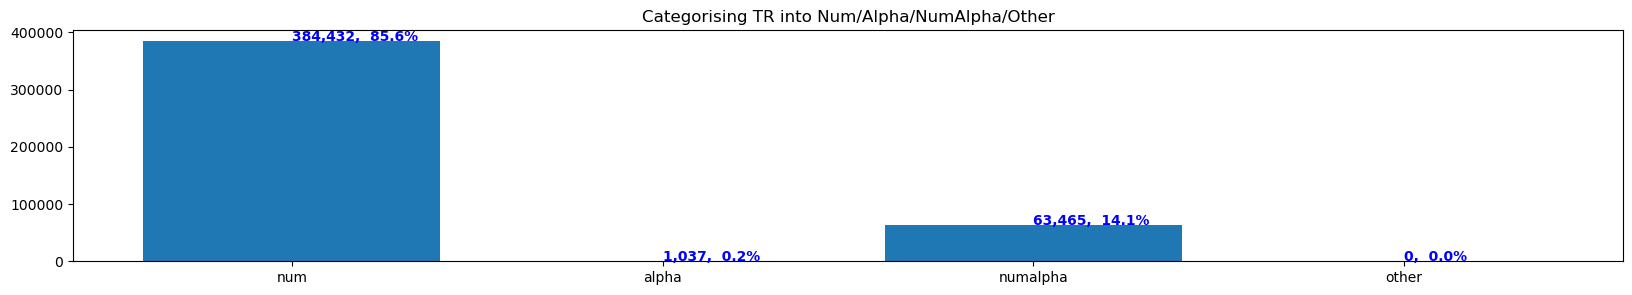

In [29]:
# plotting - Categorising TR into Num/Alpha/NumAlpha/Other

x = list(numoralpha.keys())
y = list(numoralpha.values())
total = sum(list(numoralpha.values()))

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_title('Categorising TR into Num/Alpha/NumAlpha/Other')
ax.bar(x, y)

for i, v in enumerate(y):
    ax.text(i, v, '{:,},  {}%'.format(int(v), str(round(v/total*100, 1))), color='blue', fontweight='bold')

plt.show()

In [30]:
# Distribution of TransactionReference length

TRlength = {'nan':0}
TR_nan_counter = 0
QTR_nan_counter = 0
TRset = set()
QTRset = set()
for index, row in data.iterrows():
    TR=str(row['clean_TransactionReference']); QTR=str(row['clean_TransactionReference1'])
    TRset.add(TR)
    QTRset.add(QTR)
    if(TR=='nan'): TR_nan_counter+=1
    if(QTR=='nan'): QTR_nan_counter+=1

for item in TRset:
    stay_length = len(item)
    if(item == 'nan'):
        TRlength['nan'] += 1
    else:
        TRlength[stay_length] = TRlength.get(stay_length, 0) + 1
TRlength['nan'] = TR_nan_counter

for item in QTRset:
    booking_length = len(item)
    if(item == 'nan'):
        TRlength['nan'] += 1
    else:    
        TRlength[booking_length] = TRlength.get(booking_length, 0) + 1
TRlength['nan'] = QTR_nan_counter

['nan', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '23']
[70604, 4, 47, 24, 90, 1200, 10199, 18016, 454121, 53954, 153067, 985, 30093, 12581, 3598, 197, 24, 15, 6, 56, 38, 8]


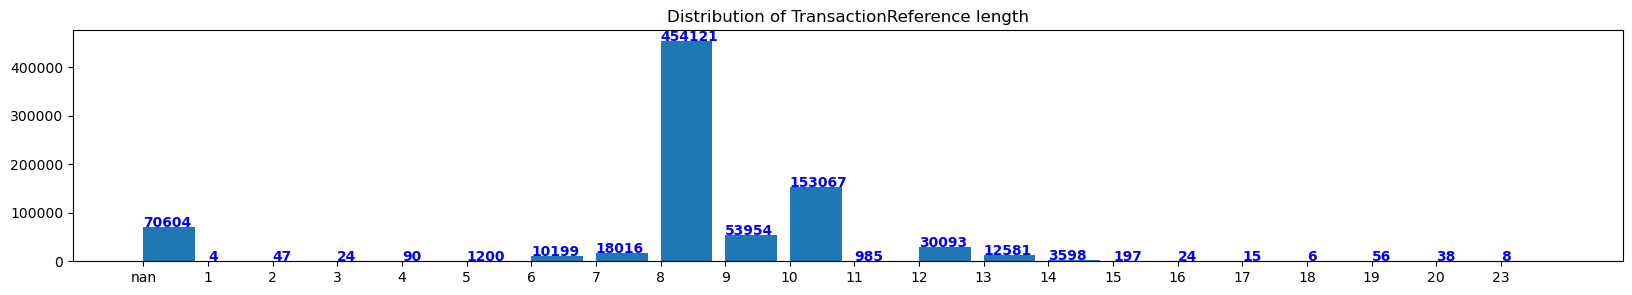

In [31]:
# plotting Distribution of TransactionReference length

without_nan = sorted([[k, v] for k, v in TRlength.items() if k!='nan'])
x = sorted([k  for k, v in without_nan])
y = sorted([v  for k, v in without_nan], key=lambda z:x)
for i, item in enumerate(x): 
    x[i] = str(item)
x.insert(0, 'nan')
y.insert(0, TRlength['nan'])
print(x); print(y)

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_title('Distribution of TransactionReference length')
ax.bar(x, y, align='edge')

for i, v in enumerate(y):
    ax.text(i, v, '{}'.format(int(v)), color='blue', fontweight='bold')

plt.show()

In [32]:
# Distribution of leveneshtein value between match/maybe_match/no_match

match_hist = {}
for i in range(12): match_hist[i]=0
maybematch_hist = {}
for i in range(12): maybematch_hist[i]=0
nomatch_hist = {}
for i in range(12): nomatch_hist[i]=0

for index, row in data.iterrows():
    lev = int(row['clean_Leveneshtein'])
    if (str(row['TransactionReferenceMatchLevelId'])=='10'):
        match_hist[lev] = match_hist.get(lev, 0) + 1
    if (str(row['TransactionReferenceMatchLevelId'])=='20'):
        maybematch_hist[lev] = maybematch_hist.get(lev, 0) + 1
    if (str(row['TransactionReferenceMatchLevelId'])=='30'):
        nomatch_hist[lev] = nomatch_hist.get(lev, 0) + 1

{0: 20131, 1: 1, 2: 1, 3: 1, 4: 4, 5: 0, 6: 1, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0}


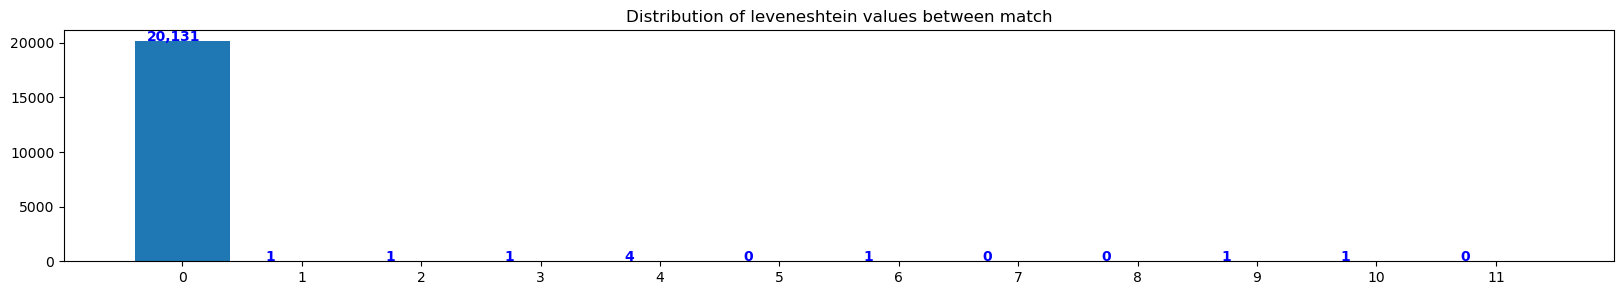

In [33]:
# plotting - Distribution of leveneshtein values between match

print(match_hist)

x = list(match_hist.keys())
y = list(match_hist.values())
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_xticks(np.arange(0,20, 1))
ax.set_title('Distribution of leveneshtein values between match')
ax.bar(x, y)

for i, v in enumerate(y):
    ax.text(i-0.3, v, '{:,}'.format(int(v)), color='blue', fontweight='bold')

plt.show()

{0: 2716, 1: 22397, 2: 34608, 3: 37480, 4: 11333, 5: 3179, 6: 1686, 7: 412, 8: 147, 9: 0, 10: 1, 11: 0, 12: 2}


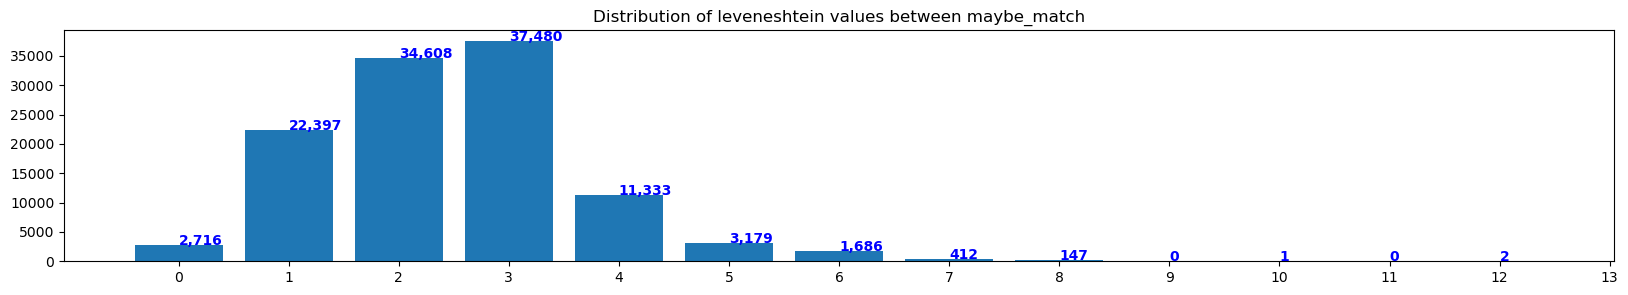

In [34]:
# plotting - Distribution of leveneshtein values between maybe_match
print(maybematch_hist)

x = list(maybematch_hist.keys())
y = list(maybematch_hist.values())
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_xticks(np.arange(0,20, 1))
ax.set_title('Distribution of leveneshtein values between maybe_match')
ax.bar(x, y)

for i, v in enumerate(y):
    ax.text(i, v + 3, '{:,}'.format(int(v)), color='blue', fontweight='bold')

plt.show()

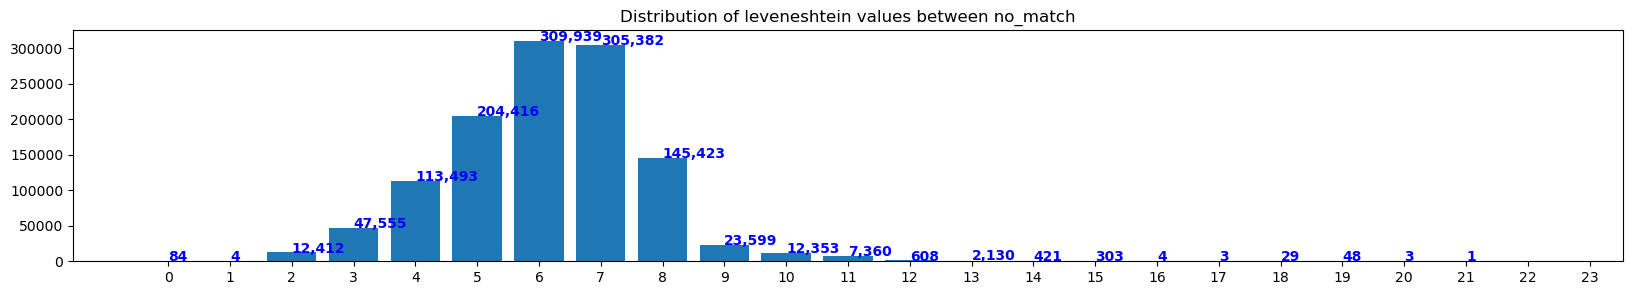

In [35]:
# plotting - Distribution of leveneshtein values between matchprint(nomatch_hist)

x = list(nomatch_hist.keys())
y = list(nomatch_hist.values())
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_xticks(np.arange(0,30, 1))
ax.set_title('Distribution of leveneshtein values between no_match')
ax.bar(x, y)

for i, v in enumerate(y):
    ax.text(i, v + 3, '{:,}'.format(int(v)), color='blue', fontweight='bold')

plt.show()

In [36]:
# Distribution between Length and type
TRlength = {}
sample_dict = {'total':0, 'NUMALPHA':0, 'NUM':0, 'ALPHA':0}

for index, row in data.iterrows():
    TR=str(row['clean_TransactionReference']); QTR=str(row['clean_TransactionReference1'])
    stay_length = len(TR)
    booking_length = len(QTR)

    if(TR == 'nan'):
        if(TRlength.get('nan', None) == None): TRlength['nan'] = {'total':0, 'NUMALPHA':0, 'NUM':0, 'ALPHA':0}
        TRlength['nan']['total'] += 1
    else:
        if(TRlength.get(stay_length, None) == None): TRlength[stay_length] = {'total':0, 'NUMALPHA':0, 'NUM':0, 'ALPHA':0}
        type = SC.get_TR_stats(TR)['numalpha_type']
        TRlength[stay_length]['total'] += 1
        TRlength[stay_length][type] += 1

    if(QTR == 'nan'):
        if(TRlength.get('nan', None) == None): TRlength['nan'] = {'total':0, 'NUMALPHA':0, 'NUM':0, 'ALPHA':0}
        TRlength['nan']['total'] += 1
    else:    
        if(TRlength.get(booking_length, None) == None): TRlength[booking_length] = {'total':0, 'NUMALPHA':0, 'NUM':0, 'ALPHA':0}
        type = SC.get_TR_stats(QTR)['numalpha_type']
        TRlength[booking_length]['total'] += 1
        TRlength[booking_length][type] += 1

without_nan = sorted([[k, v] for k, v in TRlength.items() if k!='nan'])
sort_by = sorted([k  for k, v in without_nan])
TRlength_sortedvalues = sorted([v  for k, v in without_nan], key=lambda z:sort_by)

total_list = [item['total'] for item in TRlength_sortedvalues]
NUM_list = [item['NUM'] for item in TRlength_sortedvalues]
ALPHA_list = [item['ALPHA'] for item in TRlength_sortedvalues]
NUMALPHA_list = [item['NUMALPHA'] for item in TRlength_sortedvalues]

sort_by.insert(0, 'nan')
total_list.insert(0, TRlength['nan']['total'])
NUM_list.insert(0, TRlength['nan']['NUM'])
ALPHA_list.insert(0, TRlength['nan']['ALPHA'])
NUMALPHA_list.insert(0, TRlength['nan']['NUMALPHA'])

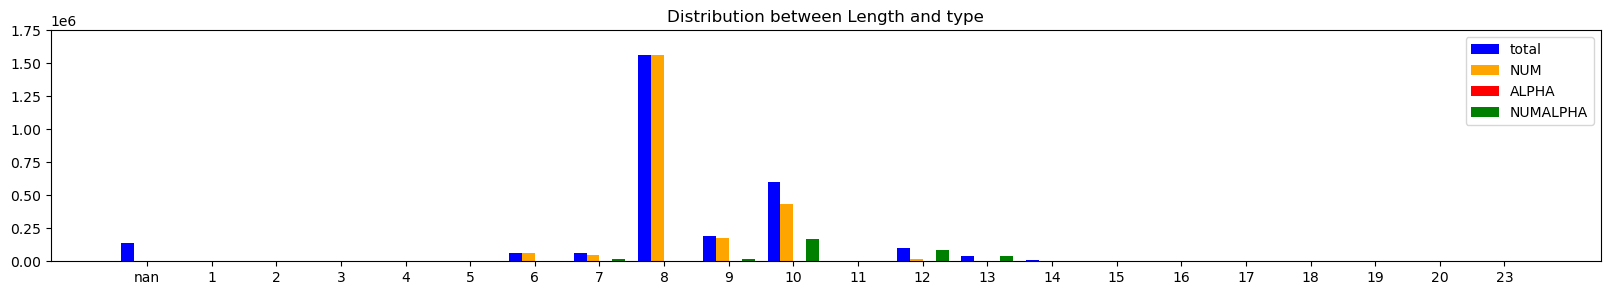

In [37]:
# plotting - Distribution between Length and type
# print('label    :', sort_by)
# print('total    :', total_list)
# print('NUM      :', NUM_list)
# print('ALPHA    :', ALPHA_list)
# print('NUM_ALPHA:', NUMALPHA_list)

x = np.arange(22)
y1 = total_list
y2 = NUM_list
y3 = ALPHA_list
y4 = NUMALPHA_list
width = 0.2

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
plt.bar(x-0.3, y1, width, color='blue')
plt.bar(x-0.1, y2, width, color='orange')
plt.bar(x+0.1, y3, width, color='red')
plt.bar(x+0.3, y4, width, color='green')
plt.xticks(x, sort_by)
plt.yticks(np.arange(0, 2000000, 250000))
plt.legend(["total", "NUM", "ALPHA", "NUMALPHA"])
plt.title('Distribution between Length and type')
plt.show()

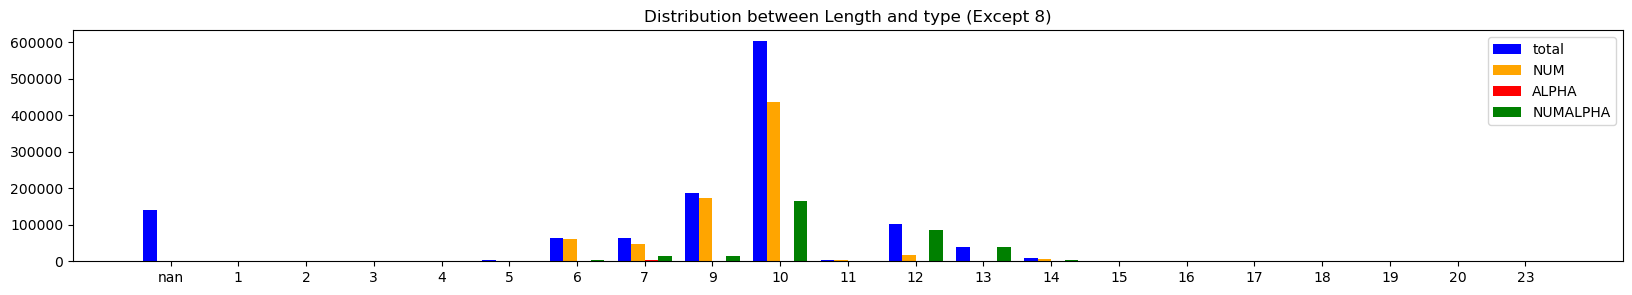

In [38]:
# plotting - Distribution between Length and type without '8'
x = np.arange(21)
y1 = total_list[:8]; y1.extend(total_list[9:])
y2 = NUM_list[:8]; y2.extend(NUM_list[9:])
y3 = ALPHA_list[:8]; y3.extend(ALPHA_list[9:])
y4 = NUMALPHA_list[:8]; y4.extend(NUMALPHA_list[9:])
sort_by2 = sort_by[:8]; sort_by2.extend(sort_by[9:])

# print('label    :', sort_by2)
# print('total    :', total_list)
# print('NUM      :', NUM_list)
# print('ALPHA    :', ALPHA_list)
# print('NUM_ALPHA:', NUMALPHA_list)

width = 0.2

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
plt.bar(x-0.3, y1, width, color='blue')
plt.bar(x-0.1, y2, width, color='orange')
plt.bar(x+0.1, y3, width, color='red')
plt.bar(x+0.3, y4, width, color='green')
plt.xticks(x, sort_by2)
plt.title('Distribution between Length and type (Except 8)')
plt.legend(["total", "NUM", "ALPHA", "NUMALPHA"])
plt.show()

In [ ]:
# select * from data where IsSelected == 1
temp = data.loc[data.index.get_level_values('IsSelected') == 1]

In [ ]:
# select * from data where Tr1_type==NUM and TR2_type==NUM
filter_num_num = temp.loc[(temp['clean_TR_numalpha_type']=='NUM') & (temp['clean_QTR_numalpha']=='NUM')]

# select * from data where Tr1_type==ALPHA and TR2_type==ALPHA
filter_alpha_alpha = temp.loc[(temp['clean_TR_numalpha_type']=='ALPHA') & (temp['clean_QTR_numalpha']=='ALPHA')]

# select * from data where Tr1_type==NUMALPHA and TR2_type==NUMALPHA
filter_num_alpha = temp.loc[((temp['clean_TR_numalpha_type']=='NUMALPHA') & (temp['clean_QTR_numalpha']=='NUMALPHA')) |
                            ((temp['clean_TR_numalpha_type']=='NUMALPHA') & (temp['clean_QTR_numalpha']=='NUMALPHA'))]
print('NUM_NUM count:', len(filter_num_num))
print('ALPHA_ALPHA count:', len(filter_alpha_alpha))
print('NUMALPHA_NUMALPHA count:', len(filter_num_alpha))

In [ ]:
# trying to find a pattern between NUM-NUM leveneshtein values
value_diff = {}
res = []
i = 0
for index, row in filter_num_num.iterrows():
    diff = int(row['clean_Levenshtein'])
    if(value_diff.get(diff, None) == None): 
        value_diff[diff] = 0
    value_diff[diff] += 1
    if(diff == 1): res.append('{}---{}---{}'.format(row['clean_TransactionReference'], row['clean_TransactionReference1'], index[4]))

print('trying to find a pattern between NUM-NUM leveneshtein values')    
print('distribution of leveneshtein values:', sorted(list(value_diff.keys())))
print()
print('samples where leveneshtein=1')
for i in res: print(i)

In [ ]:
# trying to find a pattern between NUM-NUM abs(minus) values
value_diff = {}
res = []
i = 0
for index, row in filter_num_num.iterrows():
    diff = abs( int(row['clean_TransactionReference']) - int(row['clean_TransactionReference1']) )
    print(row['clean_TransactionReference'], '---', row['clean_TransactionReference1'], '---',
        diff/ max(int(row['clean_TransactionReference']), int(row['clean_TransactionReference1'])) * 100)

    if(value_diff.get(diff, None) == None): 
        value_diff[diff] = 0
    value_diff[diff] += 1
    if(diff == 1): res.append('{}***{}---{}'.format(row['clean_TransactionReference'], row['clean_TransactionReference1'], index[4]))

print('trying to find a pattern between NUM-NUM abs(minus) values')
print('distribution of values:', sorted(list(value_diff.keys()))[:50])
print()
print('samples where abs(minus)=1')
for i in res: print(i)

In [ ]:
# trying to find a pattern between ALPHA-ALPHA leveneshtein values

value_diff = {}
res = []
i = 0
for index, row in filter_alpha_alpha.iterrows():
    diff = int(row['clean_Levenshtein'])
    if(value_diff.get(diff, None) == None): 
        value_diff[diff] = 0
    value_diff[diff] += 1
    if(diff == 0): res.append('{}---{}---{}'.format(row['clean_TransactionReference'], row['clean_TransactionReference1'], index[4]))
print('trying to find a pattern between ALPHA-ALPHA leveneshtein values')    
print('distribution of leveneshtein values:', sorted(list(value_diff.keys())))
print()
print('samples where leveneshtein=0')
for i in res[:15]: print(i)

In [ ]:
# trying to find a pattern between NUMALPHA-NUMALPHA leveneshtein values
value_diff = {}
char_value_diff = {}
res = []
i = 0
for index, row in filter_num_alpha.iterrows():
    diff = int(row['clean_Levenshtein'])
    if(value_diff.get(diff, None) == None): 
        value_diff[diff] = 0
    value_diff[diff] += 1
    if(diff == 1): res.append('{}***{}---{}'.format(row['clean_TransactionReference'], row['clean_TransactionReference1'], index[4]))
print('trying to find a pattern between NUMALPHA-NUMALPHA leveneshtein values')
print('distribution of leveneshtein values:', sorted(list(value_diff.keys())))
print()
print('samples where leveneshtein=1')
for i in res: print(i)

In [ ]:
# trying to find a pattern between NUMALPHA-NUMALPHA chars and ngram_chars
char_value_diff = {}
ngram_char_value_diff = {}
i = 0
for index, row in filter_num_alpha.iterrows():
    for c in SC.get_alphas(row['clean_TransactionReference']):
        if(char_value_diff.get(c, None) == None): char_value_diff[c]=0
        char_value_diff[c]+=1
    for c in SC.get_alphas(row['clean_TransactionReference1']):
        if(char_value_diff.get(c, None) == None): char_value_diff[c]=0
        char_value_diff[c]+=1
    if(ngram_char_value_diff.get(SC.get_alphas(row['clean_TransactionReference']), None) == None): ngram_char_value_diff[SC.get_alphas(row['clean_TransactionReference'])] = 0
    ngram_char_value_diff[SC.get_alphas(row['clean_TransactionReference'])] += 1

    if(ngram_char_value_diff.get(SC.get_alphas(row['clean_TransactionReference1']), None) == None): ngram_char_value_diff[SC.get_alphas(row['clean_TransactionReference1'])] = 0
    ngram_char_value_diff[SC.get_alphas(row['clean_TransactionReference1'])] += 1

    if(diff == 1): res.append('{}***{}---{}'.format(row['clean_TransactionReference'], row['clean_TransactionReference1'], index[4]))

print('trying to find a pattern between NUMALPHA-NUMALPHA chars')
print('distribution of chars:', dict_sort(char_value_diff))
print('--------------------------------')
print('trying to find a pattern between NUMALPHA-NUMALPHA ngram_chars')
print('distribution of chars:', dict_sort(ngram_char_value_diff))

In [ ]:
# looking for similarities after removing chars from TR NUMALPHA's type
def replace_with_dash(text):
    for i, c in enumerate(text):
        if(c.isdigit() == False):
           text[i]='-'

    text = text.split('-')    
    return text

split_diff = {'total':0, '00':0, '01':0, '10':0, '11':0}
res = []
i = 0
for index, row in filter_num_alpha.iterrows():
    c1 = SC.get_alphas(row['clean_TransactionReference'])
    c2 = SC.get_alphas(row['clean_TransactionReference1'])

    sp1 = str(row['clean_TransactionReference']).split(c1)
    sp2 = str(row['clean_TransactionReference']).split(c2)

    split_diff['total'] += 1

    for i, v1 in enumerate(sp1):
        for j, v2 in enumerate(sp2):            
            if(v1==v2):
                split_diff['{}{}'.format(i,j)]+=1
                if(len(c1)<4 and c1!=c2 and i==j): res.append('{}---{}---{}'.format(row['clean_TransactionReference'], row['clean_TransactionReference1'], index[4]))

print(split_diff)

x = list(split_diff.keys())
y = list(split_diff.values())
total = sum(list(numoralpha.values()))

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.set_title('Similarities between TRs after removing chars from NUMALPHA types')
ax.bar(x, y)

for i, v in enumerate(y):
    ax.text(i, v, '{:,}'.format(int(v)), color='blue', fontweight='bold')

# plt.show()

for i in res[:200]: print(i)

In [93]:
TR_grouped = data.groupby('TransactionReference').size()
QTR_grouped= data.groupby('TransactionReference1').size()

print(TR_grouped[TR_grouped > 100])
# print()
# print(QTR_grouped[QTR_grouped > 50])

TransactionReference
52519722    170
52523816    170
80703788    389
96057469    108
JNAP1       139
UNKNOWN     108
dtype: int64


In [94]:
# k = 0
# for index, row in data.iterrows():
#     if(row['TransactionReference'] == '80703788'):
#         k+=1
#         print(row['ConsumerFirstNameNormalized'], row['ConsumerLastNameNormalized'], \
#               row['ConsumerFirstNameNormalized1'] , row['ConsumerLastNameNormalized1'], \
#               row['TransactionLineOperationId'], row['SupplierName'], row['SupplierCode'], row['SupplierCountryCode'], \
#                 row["BuyerCode"], row["BuyerName"])
#     if(k>50): break
# k

In [95]:
BuyerCode_grouped = data.groupby('BuyerCode').size()
SupplierCode_grouped = data.groupby('SupplierCode').size()

print('number of BuyerCode: ', len(BuyerCode_grouped))
print('number of SupplierCodes: ', len(SupplierCode_grouped))

number of BuyerCode:  5923
number of SupplierCodes:  29888


In [96]:
def calculate_zscore_per_class(class_data, func=lambda z:z>2):    
    div = int(len(class_data) * 75 / 100)
    lst_lessthan_95per = class_data[:div]
    lst_morethan_95per = class_data[div:]

    # print(min(lst_lessthan_95per))
    # print(max(lst_lessthan_95per))
    # print(len(lst_lessthan_95per))

    pre_num = 0
    result = []
    for i, n in enumerate(lst_morethan_95per):
        if(pre_num > 0):
            lst_lessthan_95per = x[:80+i]
            # print('len(x_lessthan_900): ', len(lst_lessthan_95per))
        mean = np.mean(lst_lessthan_95per)
        std_dev = np.std(lst_lessthan_95per)
        pre_num = n

        # Calculate the z-score of the new number
        z_score = (n - mean) / std_dev
        result.append(z_score)
        # if abs(z_score) <= 1.5: # we can use 2 as  well
        #     print("The new number is from the same series: ", z_score, ' ', n)
        # else:
        #     print("The new number is not from the same series: ", z_score, ' ', n)

    return [any([func(i) for i in result]), max(result)]

In [145]:
supliercodes_data = data[data['clean_TR_numalpha_type']=='NUM']
supliercodes = supliercodes_data['SupplierCode'].drop_duplicates()
result = {}

for suppliercode in supliercodes:
    x = supliercodes_data['clean_TransactionReference'][supliercodes_data['SupplierCode'] == suppliercode].drop_duplicates().astype(float)
    if(len(x)<=3): continue
    flag, z_score = calculate_zscore_per_class(x, lambda z:z>2)    
    result[suppliercode]= {'sup_code':suppliercode, 'z_score':z_score, 'lambda':2, 'length':len(x) }

In [147]:
file = open('./z_scores.dict', 'w+b')
pickle.dump(result, file)
file.close()

In [148]:
result = pickle.load(open('z_scores.dict', 'r+b'))

z_scores = np.array([round(abs(v['z_score']),2) for k, v in result.items()])
lengths = np.array([v['length'] for k, v in result.items()])
print(len(z_scores))
print(sum(z_scores<=3))
print(sum(z_scores>3))
print(max(z_scores))

z_scores_lessthan_3 = sorted(z_scores[z_scores<=10])
z_scores_morethan_3 = sorted(z_scores[z_scores>3])

13222
12344
878
22210510.64


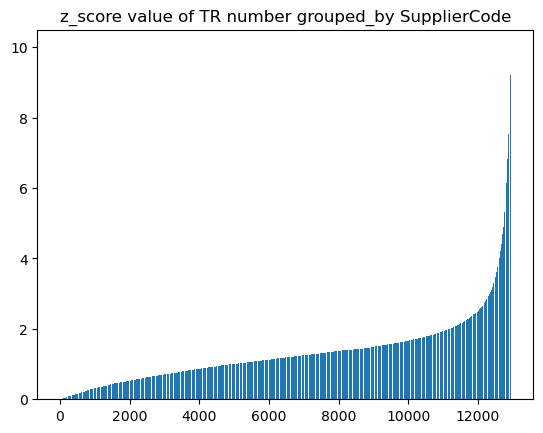

In [149]:
# create x-axis values
x_values = range(len(z_scores_lessthan_3))
# plot the data
plt.bar(x_values, z_scores_lessthan_3)
plt.title('z_score value of TR number grouped_by SupplierCode')
plt.show()

In [ ]:
for k, v in result.items():
    if(v['z_score'] < 4):
        print(supliercodes_data[['clean_TransactionReference', 'FromDate']][supliercodes_data['SupplierCode'] == k].drop_duplicates())

In [25]:
print('TR1, TR2, Jaro_Winkler, Levenshtein, Damerau_Levenshtein, Jaccard, LCS, LCS_no_num, LCS_no_letter')
for index, row in data.iterrows():
    if(row['clean_TR_no_alphas'] != row['clean_QTR_no_alphas'] and 
       row['clean_TR_no_nums'] != row['clean_QTR_no_nums'] and 
       cm.Compare(str(row['clean_TransactionReference']), str(row['clean_TransactionReference1']))==30 and
       len(str(row['clean_TransactionReference']))>=8 and
       row['clean_TR_no_alphas']>0 and row['clean_TR_no_nums']>0):
        
        print('{},{},{},{},{},{},{},{},{}'.format(
            row['clean_TransactionReference'], row['clean_TransactionReference1'], 
            row['clean_Jaro_Winkler'], row['clean_Leveneshtein'], row['clean_damerau_lev'], 
            row['clean_Jaccard'], row['clean_LCS'], SC.no_digits(str(row['clean_LCS'])), SC.no_alphas(str(row['clean_LCS']))))

TR1, TR2, Jaro_Winkler, Levenshtein, Damerau_Levenshtein, Jaccard, LCS, LCS_no_num, LCS_no_letter
HY0037355788, 37347923, 0.611111111111111, 9, 9, 0.2, 3737, 4, 0
HY0037355788, 37347923, 0.611111111111111, 9, 9, 0.2, 3737, 4, 0
9346TI1510, nan, 0.0, 10, 10, 0.0, , 0, 0
64585SB064062, 47318985, 0.42414529914529914, 12, 12, 0.25, 485, 3, 0
64585SB064062, 47318984, 0.5352564102564102, 11, 11, 0.16666666666666666, 484, 3, 0
15092SB001269, 60819, 0.49914529914529915, 10, 10, 0.4444444444444444, 019, 3, 0
15092SB001269, 60819, 0.49914529914529915, 10, 10, 0.4444444444444444, 019, 3, 0
15092SB001269, 60819, 0.49914529914529915, 10, 10, 0.4444444444444444, 019, 3, 0
64585SB064061, 47318985, 0.42414529914529914, 12, 12, 0.36363636363636365, 485, 3, 0
64585SB064061, 47318984, 0.5352564102564102, 11, 11, 0.2727272727272727, 484, 3, 0
CI2VMOD0, 1341499089, 0.4083333333333334, 9, 9, 0.07692307692307693, 0, 1, 0
CI2VMOD0, 1341499089, 0.4083333333333334, 9, 9, 0.07692307692307693, 0, 1, 0
SHMLBDX2T, 

In [ ]:
# calculate_zscore_per_class(data['TransactionReference'][data['SupplierCode'=='Hx15379780']])
# data[data['SupplierCode'=='Hx15379780']]

# calculate_zscore_per_class(data['TransactionReference'][data['SupplierCode'] == 'SFOBG'].drop_duplicates().astype(float))
calculate_zscore_per_class(data['clean_TransactionReference'][data['SupplierCode'] == 'STO214'].drop_duplicates().astype(float), lambda z:z>5)
# data[['clean_TransactionReference', 'FromDate']][data['SupplierCode'] == 'STO214'].drop_duplicates()

In [110]:
cm = CM.ConfNoComparator()

# print(cm.Compare('3269VK1514', '3269VK1516'))
# print(cm.Compare('2095VJT550', '2095VJT580'))
# print(cm.Compare('1565VK1522', '1565VK1524'))
# print(cm.Compare('B1Z1VJN536', 'B1Z1VJN534'))
# print(cm.Compare('8657VK0504', '8657VK0524'))
# print(cm.Compare('5347VK2634', '5347VK2630'))
print(cm.Compare('2939VJQ504', '2939VJQ506'))


print('x', cm.Compare('IHW-614790942-1', '614790942'))
# print('x', cm.Compare('IHW-615229355-1', '615229355'))
# print('x', cm.Compare('614790942', 'IHW-614790942-1'))
# print('x', cm.Compare('615229355', 'IHW-615229355-1'))

# print('614790942' in 'IHW-614790942-1')

cm.Compare('QAGIGF', 'QAGIGF')

10
x 30


20

In [48]:
for index, row in data.iterrows():
    if(row['clean_TransactionReference1'][:2] == '01'):
        print(row['clean_TransactionReference1'])

In [52]:
for i in TRs:
    if(i[:2] == 'HY'):
        print(i)

HY0040486217
HY0038851425
HY0043867043
HY0041125156
HY0043683429
HY0042324933
HY0042921254
HY0064625827
HY0043426570
HY0043566027
HY0042620535
HY0043972989
HY0042383548
HY0043556547
HY0043445565
HY0042727250
HY0043743129
HY0041665080
HY0015510350
HY0041098094
HY0067025802
HY0042325363
HY0043151282
HY0008269831
HY0041979747
HY0032274143
HY0043343207
HY0060708907
HY0041106486
HY0042468938
HY0053400005
HY0037104362
HY0043991162
HY0042870571
HY0041502799
HY0042243919
HY0043862780
HY0065990190
HY0043375434
HY0020289119
HY0043928234
HY0042788800
HY0041331658
HY0040514393
HY0041355287
HY0039751139
HY0036156375
HY0065525716
HY0042051833
HY0042890771
HY0043408981
HY0037746238
HY0042188522
HY0042916857
HY0014968159
HY0043820080
HY0043063539
HY0043613738
HY0060576432
HY0042204900
HY0044177058
HY0044098465
HY0040600336
HY0041674851
HY0025905995
HY0043576887
HY0038847711
HY0041902291
HY0043517488
HY0043534076
HY0052225339
HY0041883141
HY0041803089
HY0043359162
HY0043869280
HY0043823797
HY0040595023

In [150]:
def smith_waterman(seq1, seq2, match_score=2, gap_penalty=-1, mismatch_penalty=-1):
    """
    Smith-Waterman algorithm for sequence alignment.
    """
    # Initialize the score matrix with zeros
    rows = len(seq1) + 1
    cols = len(seq2) + 1
    score_matrix = [[0 for col in range(cols)] for row in range(rows)]
    
    # Fill the score matrix
    for i in range(1, rows):
        for j in range(1, cols):
            match = score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty)
            delete = score_matrix[i-1][j] + gap_penalty
            insert = score_matrix[i][j-1] + gap_penalty
            score_matrix[i][j] = max(0, match, delete, insert)
    
    # Find the maximum score and its position
    max_score = 0
    max_pos = (0, 0)
    for i in range(rows):
        for j in range(cols):
            if score_matrix[i][j] > max_score:
                max_score = score_matrix[i][j]
                max_pos = (i, j)
    
    # Traceback to find the aligned sequences
    aligned_seq1 = []
    aligned_seq2 = []
    i, j = max_pos
    while score_matrix[i][j] != 0:
        if score_matrix[i][j] == score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty):
            aligned_seq1.append(seq1[i-1])
            aligned_seq2.append(seq2[j-1])
            i -= 1
            j -= 1
        elif score_matrix[i][j] == score_matrix[i-1][j] + gap_penalty:
            aligned_seq1.append(seq1[i-1])
            aligned_seq2.append('-')
            i -= 1
        elif score_matrix[i][j] == score_matrix[i][j-1] + gap_penalty:
            aligned_seq1.append('-')
            aligned_seq2.append(seq2[j-1])
            j -= 1
    aligned_seq1.reverse()
    aligned_seq2.reverse()
    
    return max_score, ''.join(aligned_seq1), ''.join(aligned_seq2)